In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [4]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean, std

In [ ]:
# transforms.Compose(): This function is used to compose multiple transformations into a single transformation.
# transforms.ToTensor(): This transformation converts a PIL image to a PyTorch tensor.
# transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)): This transformation normalizes the pixel values of the image to have a mean of 0.5 and a standard deviation of 0.5 for each color channel (R, G, B).
# Purpose:               r   g     b       r   g     b
# The purpose of this transformation is to prepare image data for training a neural network. By normalizing the pixel values, the network can learn more efficiently and accurately

In [5]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [7]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

In [9]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# This line of code reverses the normalization process that was applied to the image earlier. When normalizing an image, 
# the pixel values are usually scaled to a range between -1 and 1 or 0 and 1. This line of code scales the pixel values back 
# to their original range.
# This line of code converts the PyTorch tensor img to a NumPy array npimg.
# In PyTorch, images are typically represented as tensors with shape (channels, height, width). However, Matplotlib's 
# imshow function expects images to have shape (height, width, channels). This line of code swaps the dimensions to match
# Matplotlib's expectations.

In [ ]:
train_loader

In [12]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
images, labels = next(iter(train_loader))

In [13]:
images

tensor([[[[-0.7020, -0.6863, -0.5922,  ..., -0.6706, -0.7098, -0.7569],
          [-0.4275, -0.3020, -0.4118,  ..., -0.6471, -0.7255, -0.7725],
          [-0.5608, -0.3020, -0.1137,  ..., -0.6157, -0.6078, -0.7569],
          ...,
          [-0.8353, -0.7961, -0.7176,  ..., -0.7490, -0.7882, -0.7333],
          [-0.7961, -0.7804, -0.7255,  ..., -0.6314, -0.7255, -0.7098],
          [-0.7176, -0.7882, -0.7647,  ..., -0.6863, -0.6863, -0.7098]],

         [[-0.6706, -0.6627, -0.6078,  ..., -0.7020, -0.7412, -0.7882],
          [-0.3961, -0.3020, -0.4431,  ..., -0.6784, -0.7490, -0.7961],
          [-0.5529, -0.3255, -0.1529,  ..., -0.6392, -0.6235, -0.7804],
          ...,
          [-0.8510, -0.8118, -0.7333,  ..., -0.7725, -0.8118, -0.7569],
          [-0.8118, -0.7961, -0.7412,  ..., -0.6549, -0.7490, -0.7333],
          [-0.7333, -0.8039, -0.7804,  ..., -0.7098, -0.7098, -0.7333]],

         [[-0.4353, -0.4275, -0.3412,  ..., -0.4353, -0.4824, -0.5294],
          [-0.1765, -0.0431, -

In [14]:
labels

tensor([6, 8, 6, 5])

In [ ]:
# images: A tensor of images with shape (B, C, H, W), where:
# B is the batch size (number of images).
# C is the number of color channels (e.g., 3 for RGB).
# H is the height of each image.
# W is the width of each image.
# Returns:
# A tensor with shape (C, H_grid, W_grid), where:
# H_grid is the height of the grid.
# W_grid is the width of the grid.

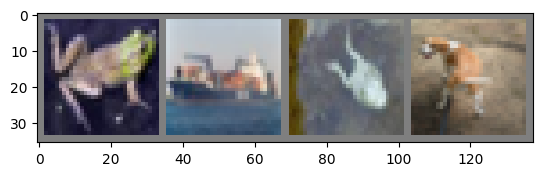

In [15]:
# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
no_of_class = 10

In [ ]:
# This code defines a series of layers for a Convolutional Neural Network (CNN) in PyTorch.

# self.conv1 = nn.Conv2d(3, 6, 5):

# This line defines the first convolutional layer.
# 3: The number of input channels (e.g., 3 for RGB images).
# 6: The number of output channels (filters).
# 5: The size of the convolutional kernel (filter size).
# self.pool = nn.MaxPool2d(2, 2):

# This line defines a max-pooling layer.
# 2, 2: The size of the pooling window is 2x2.  # stride 2
# self.conv2 = nn.Conv2d(6, 16, 5):

# This defines the second convolutional layer.
# 6: The number of input channels (from the previous convolutional layer).
# 16: The number of output channels.
# 5: The size of the convolutional kernel.
# self.fc1 = nn.Linear(16 * 5 * 5, 120):

# This defines the first fully connected (linear) layer.
# 16 * 5 * 5: The input size of this layer. This is calculated based on the output of the previous convolutional layers and pooling.
# 120: The number of neurons in this layer.
# self.fc2 = nn.Linear(120, 84):

# This defines the second fully connected layer.
# 120: The input size from the previous fully connected layer.
# 84: The number of neurons in this layer.
# self.fc3 = nn.Linear(84, 10):

# This defines the final fully connected layer.
# 84: The input size from the previous fully connected layer.
# 10: The number of output neurons. This likely corresponds to the number of classes in a classification problem (e.g., 10 classes for classifying images of digits 0-9).

In [16]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # This is the constructor method that initializes the ConvNet class. The super function calls the constructor of the parent class (nn.Module).
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # fc1, fc2, and fc3: Fully connected (dense) layers with the specified input and output dimensions.

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


In [ ]:
# x = self.pool(F.relu(self.conv1(x)))

# self.conv1(x): This applies the first convolutional layer (self.conv1) to the input data x.
# F.relu(): Applies the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity to the output of the convolutional layer.
# self.pool(): Applies a max-pooling operation to the output of the ReLU activation, downsampling the feature maps and reducing their spatial dimensions.
# The comment # -> n, 6, 14, 14 indicates the expected output shape of this step:
# n: Batch size.
# 6: Number of output channels from the first convolutional layer.
# 14, 14: Spatial dimensions of the feature maps after convolution and pooling.
# x = self.pool(F.relu(self.conv2(x)))

# Similar to the first step, this applies the second convolutional layer (self.conv2), ReLU activation, and max-pooling.
# The comment # -> n, 16, 5, 5 indicates the expected output shape after these operations.
# x = x.view(-1, 16 * 5 * 5)

# This line reshapes the output tensor into a 1D vector.
# -1: This tells PyTorch to automatically infer the size of the first dimension (batch size) based on the other dimensions.
# This step is necessary to prepare the data for the subsequent fully connected layers, which expect a 1D input.
# x = F.relu(self.fc1(x))

# This applies the first fully connected layer (self.fc1) to the reshaped input.
# F.relu() introduces non-linearity to the output of the fully connected layer.
# x = F.relu(self.fc2(x))

# This applies the second fully connected layer (self.fc2) and applies ReLU activation.
# x = self.fc3(x)

# This applies the final fully connected layer (self.fc3), which typically produces the final output of the network. In this case, it likely produces the logits for a classification task.
# return x

# The output of the final layer (x) is returned by the forward function.

In [17]:
model = ConvNet().to(device)

In [ ]:
# This line defines the loss function, also known as the criterion, as the Cross-Entropy Loss function. This is a common 
# loss function used for classification problems, where the goal is to predict one of multiple classes.

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:

# This code defines the loss function and optimizer for training a neural network in PyTorch:
# Loss Function (Criterion)
# Python
# criterion = nn.CrossEntropyLoss()
# This line defines the loss function, also known as the criterion, as the Cross-Entropy Loss function. This is a common loss function used for classification problems, where the goal is to predict one of multiple classes.
# Optimizer
# Python
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# This line defines the optimizer as Stochastic Gradient Descent (SGD) with a learning rate of learning_rate. The optimizer is responsible for updating the model's parameters to minimize the loss.
# Parameters:
# model.parameters(): This specifies the model's parameters that will be updated by the optimizer.
# lr=learning_rate: This specifies the learning rate, which controls how quickly the optimizer updates the model's parameters.

In [19]:
n_total_steps = len(train_loader)

In [ ]:
# Forward pass: The input data is passed through the model to produce output.
# Loss calculation: The loss is calculated by comparing the model's output to the true labels using the Cross-Entropy Loss function.
# Backward pass: The gradients of the loss with respect to the model's parameters are computed using backpropagation.
# Optimization: The optimizer updates the model's parameters based on the gradients and the learning rate.

train

In [20]:
for epoch in range(num_epochs): # number of ite
    for i, (images, labels) in enumerate(train_loader): # step of optimization
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images) # imput images batch of 4 images
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # optimizer.zero_grad(): Zeroes the gradients of the optimizer.
        # loss.backward(): Computes the gradients of the loss with respect to the model's parameters using backpropagation.
        # optimizer.step(): Updates the model's parameters based on the gradients and the optimizer's hyperparameters.

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [2000/12500], Loss: 2.3404
Epoch [1/5], Step [4000/12500], Loss: 2.2839
Epoch [1/5], Step [6000/12500], Loss: 2.2946
Epoch [1/5], Step [8000/12500], Loss: 2.2921
Epoch [1/5], Step [10000/12500], Loss: 2.2197
Epoch [1/5], Step [12000/12500], Loss: 1.8895
Epoch [2/5], Step [2000/12500], Loss: 1.8026
Epoch [2/5], Step [4000/12500], Loss: 2.1959
Epoch [2/5], Step [6000/12500], Loss: 2.3158
Epoch [2/5], Step [8000/12500], Loss: 2.1100
Epoch [2/5], Step [10000/12500], Loss: 1.6210
Epoch [2/5], Step [12000/12500], Loss: 1.9028
Epoch [3/5], Step [2000/12500], Loss: 1.2923
Epoch [3/5], Step [4000/12500], Loss: 1.3227
Epoch [3/5], Step [6000/12500], Loss: 1.6681
Epoch [3/5], Step [8000/12500], Loss: 2.4345
Epoch [3/5], Step [10000/12500], Loss: 1.6244
Epoch [3/5], Step [12000/12500], Loss: 1.8034
Epoch [4/5], Step [2000/12500], Loss: 1.8080
Epoch [4/5], Step [4000/12500], Loss: 1.9101
Epoch [4/5], Step [6000/12500], Loss: 1.2704
Epoch [4/5], Step [8000/12500], Loss: 2.0343
Epoc

In [ ]:
# After completing all batches in the training data loader, the outer loop iterates to the next epoch.
#  This process repeats until the specified number of epochs is reached.

In [21]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)
# The model.state_dict() method returns a dictionary containing the model's learnable parameters, such as weights and 
# biases. This dictionary is then saved to the file using torch.save().

Finished Training


In [1]:
import torch

In [2]:
torch.randn(4, 10)

tensor([[-0.3333, -0.3984,  0.5888,  0.9898, -0.0356, -0.3488,  0.6005, -1.0401,
         -0.0796, -1.0242],
        [-0.7543, -0.8260, -1.4718,  1.2833,  0.6378, -1.2884, -0.7987,  0.3762,
          0.1999, -0.1315],
        [-0.0375,  0.0763,  0.2462, -0.8445,  0.6383,  0.1953, -0.3823, -0.5321,
         -3.0301,  0.7948],
        [-0.9970,  0.9803,  0.3229,  0.2767, -0.6912,  0.4869, -0.5164, -0.0518,
         -2.7684,  1.1579]])

evaluation

In [22]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]   # [0,0,0,0,0,0,0,0,0,0,]
    n_class_samples = [0 for i in range(10)]    # [0,0,0,0,0,0,0,0,0,0,]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images) #   outputs class [probalit value for 10 classes for 4 images] as no of batch size 4
        # [[-0.3333, -0.3984,  0.5888,  0.9898, -0.0356, -0.3488,  0.6005, -1.0401,
        #  -0.0796, -1.0242],
        # [-0.7543, -0.8260, -1.4718,  1.2833,  0.6378, -1.2884, -0.7987,  0.3762,
        #   0.1999, -0.1315],
        # [-0.0375,  0.0763,  0.2462, -0.8445,  0.6383,  0.1953, -0.3823, -0.5321,
        #  -3.0301,  0.7948],
        # [-0.9970,  0.9803,  0.3229,  0.2767, -0.6912,  0.4869, -0.5164, -0.0518,
        #  -2.7684,  1.1579]])
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)  # Finds the [maximum probablity value along the dimension 1 (columns) for each sample in the batch.]
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1 # [4,7,2,0,5,4,7,2,6,2]
            n_class_samples[label] += 1     # [12,34,56,32,56,32,67,23,45,23]

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 50.14 %
Accuracy of plane: 50.2 %
Accuracy of car: 67.6 %
Accuracy of bird: 41.6 %
Accuracy of cat: 21.9 %
Accuracy of deer: 35.1 %
Accuracy of dog: 47.3 %
Accuracy of frog: 54.9 %
Accuracy of horse: 63.9 %
Accuracy of ship: 67.3 %
Accuracy of truck: 51.6 %


In [ ]:
# _, predicted = torch.max(outputs, 1): This line extracts the predicted class labels from the model's output.
# torch.max(outputs, 1): Finds the maximum value along the dimension 1 (columns) for each sample in the batch.
# _: Discards the maximum values (logits) and keeps only the indices of the maximum values (predicted class labels) in the predicted variable.
# n_samples += labels.size(0): Accumulates the total number of samples in the current batch.
# n_correct += (predicted == labels).sum().item(): This line calculates the number of correct predictions in the current batch:
# predicted == labels: Creates a tensor where each element is True if the corresponding prediction matches the label, False otherwise.
# .sum(): Sums the True elements to get the total number of correct predictions in the batch.
# .item(): Converts the tensor containing the number of correct predictions to a Python integer.
# 6. Class-wise Accuracy:

# for i in range(batch_size): This loop iterates over each sample in the current batch.
# label = labels[i]: Gets the ground truth label for the current sample.
# pred = predicted[i]: Gets the predicted label for the current sample.
# if (label == pred): Checks if the prediction is correct.
# n_class_correct[label] += 1: If correct, increments the count of correct predictions for the corresponding class in n_class_correct.
# n_class_samples[label] += 1: Increments the total number of samples for the corresponding class in n_class_samples.